# Pipeline 3.2: 
#### _Min Max -> Normalization -> 3 STD_
_Locked Up_ - Bridget Weill - Fairfield University - MSBA Capstone Project

------------------

### Import Data & Packages

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline


# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from scipy.stats import boxcox
from scipy import stats

In [2]:
data_cat_enc = pd.read_csv('data_cat_enc.csv')

In [3]:
datacont = pd.read_csv('datacont.csv')

In [4]:
target = pd.read_csv('target.csv')

### __Min Max__

Min Max is one of the most common ways to normalize.  For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.
- For example, if the minimum value of a feature was 20, and the maximum value was 40, then 30 would be transformed to about 0.5 since it is halfway between 20 and 40. 

*Key Benefit:* Gaurantees all features will have the exact same scale

*Key Downside:* Does not handle outliers very well, so this will be important to note as we go through our analysis

In [5]:
# use MinMaxScaler to transform the data to fit
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()

# fit and transform in one step
datacont = scaler.fit_transform(datacont)

# rename the df to make it easier to continue with normalization 
data_cont_transform = pd.DataFrame(datacont)

In [6]:
data_cont_transform.columns=['Age']

In [7]:
# confirm all the data is between 0 and 1 (min and max)
data_cont_transform.describe()

,Age
count,3474.000000
mean,0.311073
std,0.178456
min,0.000000
25%,0.166667
50%,0.283333
75%,0.433333
max,1.000000


__Boxplot:__

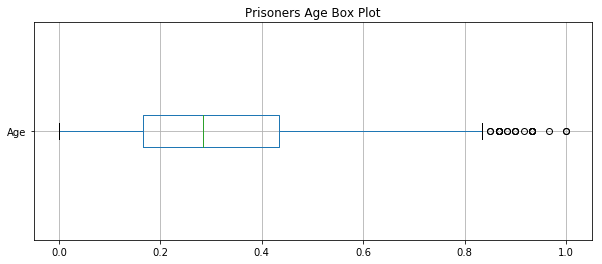

In [8]:
data_cont_transform.boxplot(vert=False, figsize=(10,4))
plt.title('Prisoners Age Box Plot')
plt.show()

### __Normalization__

Normalizing the skewness of the data makes it more symmetric. With symmetric data, the mean, median & mode will be equal, if not, the data is either positively or negatively skewed.
- *Symmetrical*: skewness between -0.5 and 0.5 (closer to 0 the better)
- *Moderately Skewed*: skewness between -1 and -0.5 or 0.5 and 1
- *Highly Skewed*: skewness less than -1 or greater than 1

__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [9]:
data_cont_transform.skew()

Age    0.645001
dtype: float64

In [10]:
data_cont_transform["AgeSkew"]= stats.yeojohnson(data_cont_transform["Age"])[0]

In [11]:
data_cont_norm = data_cont_transform.drop(['Age'], axis=1)

In [12]:
data_cont_norm.skew()

AgeSkew    0.036391
dtype: float64

__Visualize:__

After normalizing, visualize the results in histograms and compare them to the previous histograms.

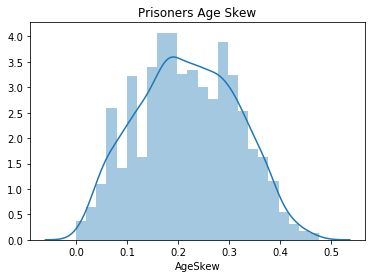

In [13]:
sns.distplot(data_cont_norm["AgeSkew"])
plt.title('Prisoners Age Skew')
plt.show()

## __3 STD__

The Standard Deviation (3STD) measures the variation between each data point and the mean in a dataset. 

The standard deviation is used to determine and handle outliers.
- A loop is used to find and replace the numbers outside the upper and lower bounds. standard deviation determines these upper and lower bounds through the following formulas:
    - UpperBound = mean + 3(StandardDeviation)
    - LowerBound = mean - 3(StandardDeviation)
- Next, the for loop will replace the data outside of these bounds with the standard deviation
    - If the value is > UpperBound, it will be replaced with the UpperBound value
    - If the value is < LowerBound, it will be replaced with the LowerBound value
- A box plot can be used to check the results, there should be no black dotted outliers on the plot anymore

__Set the Upper Bound to 3 Standard Deviations Above the Mean:__

In [14]:
for col in data_cont_norm.columns:
    u_bound = data_cont_norm[col].mean() + 3* data_cont_norm[col].std()
    data_cont_norm[col][data_cont_norm[col] > u_bound] = u_bound

__Set the Lower Bound to 3 Standard Deviations Below the Mean:__

In [15]:
for col in data_cont_norm.columns:
    l_bound = data_cont_norm[col].mean() - 3*data_cont_norm[col].std()
    data_cont_norm[col][data_cont_norm[col] < l_bound] = l_bound

__Boxplot:__

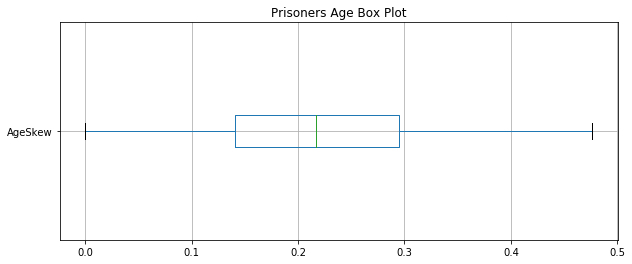

In [16]:
data_cont_norm.boxplot(vert=False, figsize=(10,4))
plt.title('Prisoners Age Box Plot')
plt.show()

## Correlation

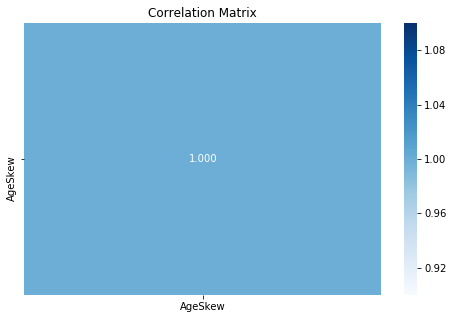

In [17]:
corr = data_cont_norm.corr()
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

- Since there is only 1 continuous value, there is no correlation with other variables

__Final DataFrame__

- Connect all 3 dataframes back together and save them as a csv

In [18]:
pipeline3_2 = pd.concat([data_cont_norm,data_cat_enc,target], axis=1)
pipeline3_2.head()

,AgeSkew,Sex_Female,Sex_Male,"Race_American Indian, Alaska Native non-Hispanic","Race_Asian, Pacific Islander, Native Hawaiian non-Hispanic",Race_Black non-Hispanic,Race_Hispanic,"Race_Multiple races, non-Hispanic",Race_White non-Hispanic,USCitizen_Not a US Citizen,...,Income_800-999,Income_No income,Weapons_Blunt object,Weapons_Firearm,Weapons_Knife,Weapons_None,Weapons_Other,Weapons_Other sharp object,Weapons_Toy or bb gun,CriminalHistoryEnc
0,0.270521,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.350136,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.186207,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.164369,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.262137,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [19]:
pipeline3_2.to_csv('../BUAN6590-Capstone-BridgetWeill/pipeline3_2.csv', index=0)